In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import sympy as sm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from types import SimpleNamespace
import math

# Ensure modules are reloaded on each run
%load_ext autoreload
%autoreload 2

# Assuming the class BeckerTomesModelDebugged is defined in the module named Noah
from Noah import BeckerTomesModelDebugged

# Create an instance of the model
model = BeckerTomesModelDebugged()


Continuous Solution: Optimal X0=0.20032705438871012
Discrete Solution: Optimal X0=0.20202020202020202
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Solve the model using continuous optimization
model.solve_continuous()
# Print the results from the continuous solution
print(f'Optimal parental investment: {model.sol.optimal_X}')
print(f'Human capital level: {model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0)}')
print(f'Optimal income: {model.calc_income(model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0), model.par.I1)}')

Continuous Solution: Optimal X0=0.20032705438871012
Optimal parental investment: 0.20032705438871012
Human capital level: 2.125648999438557
Optimal income: 2.625648999438557


In [14]:
# Solve the model using discrete optimization
model.solve_discrete()

# Access and print the optimal values from the discrete solution
print(f'Optimal X0: {model.sol.optimal_X0}')
print(f'Optimal E1: {model.endowment_production(model.par.E0)}')
print(f'Optimal H1: {model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0))}')
print(f'Optimal Y1: {model.calc_income(model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0)), model.par.I1)}')
print(f'Optimal D1: {model.calc_debt(model.sol.optimal_X0, model.par.Y0)}')

Discrete Solution: Optimal X0=0.20202020202020202
Optimal X0: 0.20202020202020202
Optimal E1: 2.7
Optimal H1: 2.33742161035749
Optimal Y1: 2.83742161035749
Optimal D1: 0.20202020202020243


Continuous Solution: Optimal X0=0.2000326235408978
Continuous Solution: Optimal X0=0.20020698195312098
Continuous Solution: Optimal X0=0.20022621028273144
Continuous Solution: Optimal X0=0.1999123758617643
Continuous Solution: Optimal X0=0.2003473114118776
Continuous Solution: Optimal X0=0.20004263266391173
Continuous Solution: Optimal X0=0.2003153366061706
Continuous Solution: Optimal X0=0.2001662517785684
Continuous Solution: Optimal X0=0.20022029632873972
Continuous Solution: Optimal X0=0.20048166783291016
Continuous Solution: Optimal X0=0.2002470477781717
Continuous Solution: Optimal X0=0.2004501068796502
Continuous Solution: Optimal X0=0.20017491426800788
Continuous Solution: Optimal X0=0.20019978548561307
Continuous Solution: Optimal X0=0.2002096147866406
Continuous Solution: Optimal X0=0.20021652633953646
Continuous Solution: Optimal X0=0.20021127255595728
Continuous Solution: Optimal X0=0.20033576579399584
Continuous Solution: Optimal X0=0.20032494075557475
Continuous Solution:

/Users/noahindrehus/Documents/KU Exchange/IPNA/projects-2024-petra-maritza-noah-1/modelproject/Noah.py:30: RuntimeWarning: invalid value encountered in power
  H1 = X0**0.4 + S0**0.5 + 0.3*E1


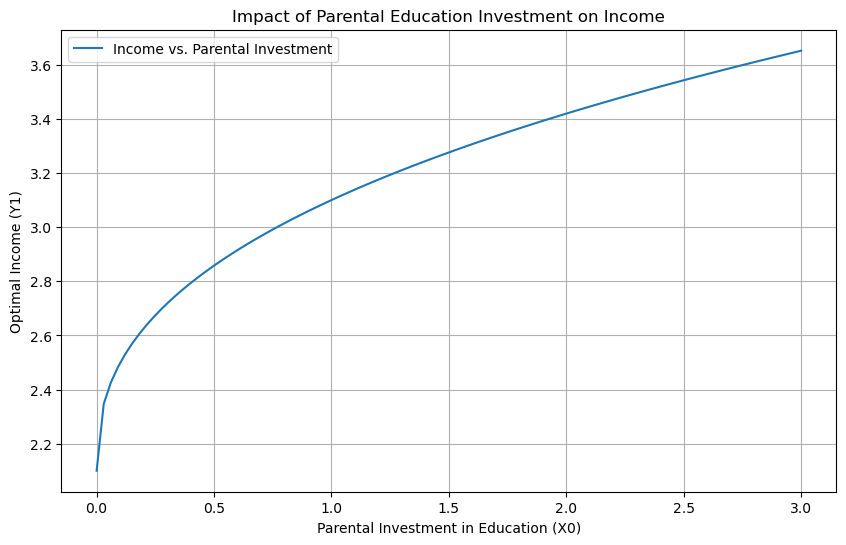

In [15]:
# Set a range of values for parental investment (X0)
X0_values = np.linspace(0, 3, 100)  # Adjust the range and count as needed
income_results = []

# Iterate over the range of X0 values, solve the model, and collect incomes
for X0 in X0_values:
    model.par.X0 = X0  # Update the parental investment parameter
    model.solve_continuous()  # Solve the model (assuming this updates the model.sol with new values)
    optimal_H = model.human_capital_production(X0, model.par.S0, model.par.E0)
    optimal_income = model.calc_income(optimal_H, model.par.I1)
    income_results.append(optimal_income)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X0_values, income_results, label='Income vs. Parental Investment')
plt.xlabel('Parental Investment in Education (X0)')
plt.ylabel('Optimal Income (Y1)')
plt.title('Impact of Parental Education Investment on Income')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from Noah import BeckerTomesModelDebugged  # Make sure to import your model correctly

# Create an instance of the model
model = BeckerTomesModelDebugged()

def interactive_plot(I1):
    # Update the luckiness parameter
    model.par.I1 = I1

    # Set a range of values for parental investment (X0)
    X0_values = np.linspace(0, 1, 100)  # Adjust the range as needed
    Y1_values = []

    # Calculate optimal income for each X0 with the current I1
    for X0 in X0_values:
        E1 = model.endowment_production(model.par.E0)
        H1 = model.human_capital_production(X0, model.par.S0, E1)
        Y1 = model.calc_income(H1, I1)
        Y1_values.append(Y1)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X0_values, Y1_values, label=f'Luckiness (I1) = {I1:.2f}')
    plt.xlabel('Parental Investment in Education (X0)')
    plt.ylabel('Optimal Income (Y1)')
    plt.title('Impact of Parental Investment on Optimal Income with Varying Luckiness')
    plt.legend()
    plt.grid(True)
    plt.show()

# Slider for luckiness
I1_slider = FloatSlider(min=0, max=1, step=0.05, value=0.5, description='Luckiness (I1)')

# Create the interactive plot
interact(interactive_plot, I1=I1_slider)

interactive(children=(FloatSlider(value=0.5, description='Luckiness (I1)', max=1.0, step=0.05), Output()), _do…

<function __main__.interactive_plot(I1)>

In [38]:
def interactive_plot(Y0):
    model.par.Y0 = Y0
    X0_values = np.linspace(0, 3, 100)  # Parental investment range
    Y1_values = []

    for X0 in X0_values:
        E1 = model.endowment_production(model.par.E0)
        H1 = model.human_capital_production(X0, model.par.S0, E1)
        Y1 = model.calc_income(H1, Y0)
        Y1_values.append(Y1)

    plt.figure(figsize=(10, 6))
    plt.plot(X0_values, Y1_values, label=f'Luckiness (I1) = {Y0:.2f}')
    plt.xlabel('Parental Investment in Education (X0)')
    plt.ylabel('Optimal Income (Y1)')
    plt.title('Impact of Parental Investment on Optimal Income with Varying Luckiness')
    plt.ylim(1.5, 5)  # Set a fixed y-axis range, adjust as needed
    plt.legend()
    plt.grid(True)
    plt.show()

Y0_slider = FloatSlider(min=0, max=1, step=0.05, value=0.5, description='Luckiness (I1)')
interact(interactive_plot, Y0=Y0_slider)

interactive(children=(FloatSlider(value=0.5, description='Luckiness (I1)', max=1.0, step=0.05), Output()), _do…

<function __main__.interactive_plot(Y0)>